# Tarea 5
## Optimización I
### Esteban Reyes Saldaña

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



---



In [2]:
dir = '/content/drive/MyDrive/CIMAT/Segundo Semestre/Optimización/'

## Lectura de Datos

In [3]:
import pickle, gzip, scipy
from scipy import special

import numpy as np
import matplotlib.pyplot as plt

In [4]:
with gzip.open(dir + 'mnist.pkl.gz', 'rb') as f:
	u = pickle._Unpickler(f)
	u.encoding = 'latin1'
	train_set, val_set, test_set = u.load()

In [5]:
print('train set :', train_set[0].shape, 'train_set_labels:', train_set[1].shape)
print('val set   :', val_set[0].shape, 'val_set_labels  :', train_set[1].shape)
print('test set  :', test_set[0].shape, 'test_set_labels :', test_set[1].shape)

train set : (50000, 784) train_set_labels: (50000,)
val set   : (10000, 784) val_set_labels  : (50000,)
test set  : (10000, 784) test_set_labels : (10000,)


#### Ejemplo

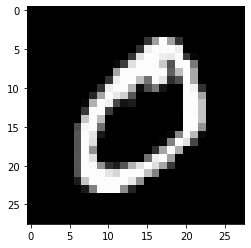

Classification :  0


In [6]:
idx = 1
im = train_set[0][idx].reshape(28, -1)
plt.imshow(im, 'gray')
plt.show()

print('Classification : ', train_set[1][idx])

## Carga de datos para entrenamiento

In [7]:
import functions as func
get_data_cero_one = func.get_data_cero_one

In [8]:
x_train, y_train = get_data_cero_one(train_set)
x_val, y_val     = get_data_cero_one(val_set)
x_test, y_test   = get_data_cero_one(test_set)

In [9]:
print('train set :', x_train.shape, 'train_set_labels:', y_train.shape)
print('val set   :', x_val.shape, ' val_set_labels  :', x_val.shape)
print('test set  :', x_test.shape, ' test_set_labels :', x_test.shape)

train set : (10610, 784) train_set_labels: (10610,)
val set   : (2055, 784)  val_set_labels  : (2055, 784)
test set  : (2115, 784)  test_set_labels : (2115, 784)


1. Maximiza la función $ h(\beta, \beta_0 ) $ , usando el algoritmo de descenso gradiente

$$ h(\beta, \beta_0) = \sum_{i = 1}^n y_i \log (\pi_i) + (1 - y_i) \log (1 - \pi_i).  $$

$$ \pi_i := \pi_i (\beta, \beta_i) = \dfrac{1}{1 + \exp(-x_i^T \beta - \beta_0)} $$
donde $ \{ (x_i, y_i) \}_{i = 1} ^n  $ se obtiene del conjunto *train_set* y $ x_i \in \mathbb{R}^{784} $ y $ y_i \in \{ 0, 1\} $.


In [10]:
transform_data      = func.transform_data
get_graf            = func.get_graf
log_likelihood      = func.log_likelihood
log_likelihood_grad = func.log_likelihood_grad

In [11]:
# Métodos para Descenso Gradiente
import optimization as opti

back_tracking = opti.back_tracking
bisection     = opti.bisection
des_grad      = opti.des_grad

In [12]:
# Valores Iniciales
'''
Agrego dimensión a x -> [[x[1], [1]], [x[2], [1]], ..., [x[n], [1]]]
                beta -> [beta, beta_0]
'''
x_train = transform_data(x_train)
beta   = np.ones(x_train.shape[1])

In [13]:
x_train.shape, beta.shape

((10610, 785), (785,))

In [14]:
# Ejemplo
params = {
          'x'       : x_train,
          'y'       : y_train,
          'epsilon' : 1e-6,
          }
log_likelihood(beta, params)

68138.0980718824

In [15]:
g = log_likelihood_grad(beta, params)

print('Dimensión de gradiente :', g.shape, 'Norma :', np.linalg.norm(log_likelihood_grad(beta, params)))

Dimensión de gradiente : (785,) Norma : 41007.38226937714


### Entrenamiento

In [16]:
from time import time

### Backtracking

iteración:  1 Norma de gradiente:  884.4578440105522
iteración:  2 Norma de gradiente:  830.5182825552891
iteración:  3 Norma de gradiente:  737.1117374567813
iteración:  4 Norma de gradiente:  262.6879017641903
iteración:  5 Norma de gradiente:  225.84358273317287
iteración:  6 Norma de gradiente:  140.80802896064114
iteración:  7 Norma de gradiente:  82.36184200688496
iteración:  8 Norma de gradiente:  39.60866391968789
iteración:  9 Norma de gradiente:  48.308692676342815
iteración:  10 Norma de gradiente:  69.16482572453252
iteración:  11 Norma de gradiente:  28.00412258134672
iteración:  12 Norma de gradiente:  72.781606740514
iteración:  13 Norma de gradiente:  27.214044424589492
iteración:  14 Norma de gradiente:  33.58928150190398
iteración:  15 Norma de gradiente:  44.34939468149088
iteración:  16 Norma de gradiente:  18.95747029619596
iteración:  17 Norma de gradiente:  37.96921503708568
iteración:  18 Norma de gradiente:  17.8369563109471
iteración:  19 Norma de gradiente:  

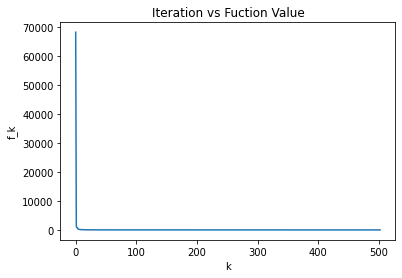

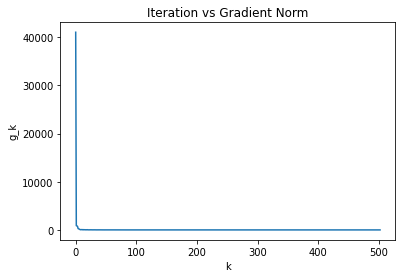

In [17]:
params = {
            'x_0'      : beta,
            'f'        : log_likelihood,
            'f_grad'   : log_likelihood_grad,
            'x'        : x_train,
            'y'        : y_train,
            'epsilon'  : 1e-6,
            'max_iter' : 500,
            'tau_x'    : 1e-12,
            'tau_f'    : 1e-12,
            'tau_grad' : 1e-8,
            'method'      : 'BackTracking',
            'BackTracking' : {
                                'alpha' : 0.5,
                                'ro'    : 0.5,
                                'c1'    : 1e-4
                             }
          }

star = time()
f_hist, g_hist, beta_hat_bt = des_grad(params)
print ('Tiempo de ejecución: ', time() - star, 'segundos.')
get_graf(f_hist, g_hist)

### Bisección

iteración:  1 Norma de gradiente:  884.4578440105522
iteración:  2 Norma de gradiente:  830.5182825552891
iteración:  3 Norma de gradiente:  737.1117374567813
iteración:  4 Norma de gradiente:  262.6879017641903
iteración:  5 Norma de gradiente:  225.84358273317287
iteración:  6 Norma de gradiente:  140.80802896064114
iteración:  7 Norma de gradiente:  82.36184200688496
iteración:  8 Norma de gradiente:  39.60866391968789
iteración:  9 Norma de gradiente:  48.308692676342815
iteración:  10 Norma de gradiente:  69.16482572453252
iteración:  11 Norma de gradiente:  28.00412258134672
iteración:  12 Norma de gradiente:  72.781606740514
iteración:  13 Norma de gradiente:  27.214044424589492
iteración:  14 Norma de gradiente:  33.58928150190398
iteración:  15 Norma de gradiente:  44.34939468149088
iteración:  16 Norma de gradiente:  18.95747029619596
iteración:  17 Norma de gradiente:  37.96921503708568
iteración:  18 Norma de gradiente:  17.8369563109471
iteración:  19 Norma de gradiente:  

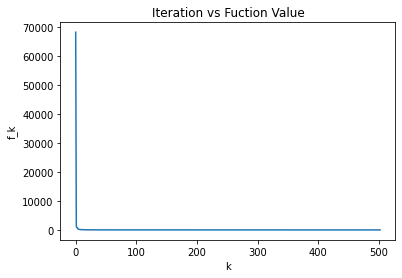

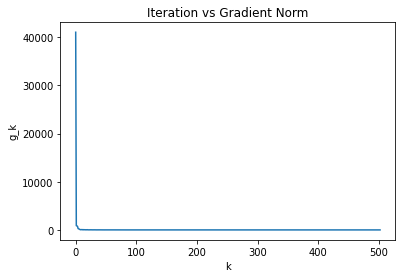

In [18]:
params = {
            'x_0'      : beta,
            'f'        : log_likelihood,
            'f_grad'   : log_likelihood_grad,
            'x'        : x_train,
            'y'        : y_train,
            'epsilon'  : 1e-6,
            'max_iter' : 500,
            'tau_x'    : 1e-12,
            'tau_f'    : 1e-12,
            'tau_grad' : 1e-8,
            'method'      : 'Bisection',
            'Bisection' : {
                            'alpha'    : 0.01,
                            'c1'       : 1e-4,
                            'c2'       : 0.9,
                            'max_iter' : 100
                          }
          }

star = time()
f_hist, g_hist, beta_hat_bic = des_grad(params)
print ('Tiempo de ejecución: ', time() - star, 'segundos.')
get_graf(f_hist, g_hist)

2. Usando $ \hat{\beta}, \hat{\beta}_0 $ calculados en el inciso anterior, calcule el error
$$ error = \dfrac{1}{n} \sum_{i=1}^n | \textbf{1} _{\pi(\hat{\beta}, \hat{\beta}_0) > 0.5 }(x_i) - y_i | $$

donde $ \{ (x_i, y_i) \}_{i = 1} ^n  $ se obtiene del conjunto *train_set* y $ x_i \in \mathbb{R}^{784} $ y $ y_i \in \{ 0, 1\} $.

In [19]:
def error(x, y, beta) :
  x = transform_data(x)
  pi_ = func.pi(beta, x)

  return np.mean(np.abs((pi_ > 0.5) - y))

#### Error BackTracking

In [20]:
error(x_test, y_test, beta_hat_bt)

0.00047281323877068556

### Error Bisección

In [21]:
error(x_test, y_test, beta_hat_bic)

0.00047281323877068556